In [9]:
import tensorflow as tf
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, \
                         Flatten, MaxPooling2D
from keras.models import Sequential
import librosa
import librosa.display
import numpy as np
import pandas as pd
import random

import warnings
warnings.filterwarnings('ignore')

In [10]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [13]:
# Read Data
data = pd.read_csv('datasets/dataset/metadata/chords.csv')
data.head(5)

,file_name,classID,classname
0,a1.wav,0,a
1,a2.wav,0,a
2,a3.wav,0,a
3,a4.wav,0,a
4,a5.wav,0,a


In [14]:
data.shape

(2000, 3)

In [6]:
valid_data=data
valid_data.shape

(2000, 3)

In [17]:
# Example of a Siren spectrogram
y, sr = librosa.load('datasets/dataset/audio/Guitar_Only/am/am89.wav',duration=2)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape


(128, 87)

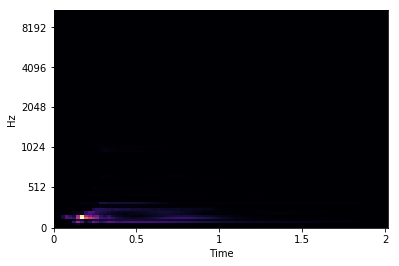

In [18]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [8]:
# Example of a Siren spectrogram
y, sr = librosa.load('datasets/dataset/audio/Guitar_Only/em/em69.wav',duration=2)
ps = librosa.feature.melspectrogram(y=y, sr=sr,)
ps.shape


(128, 87)

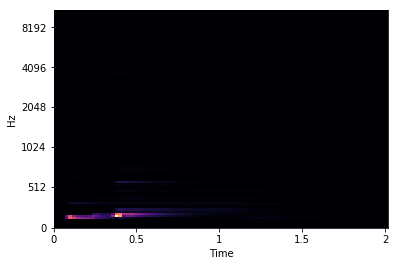

In [9]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [10]:
# Example of a Siren spectrogram
y, sr = librosa.load('datasets/dataset/audio/Guitar_Only/g/g200.wav',duration=2)
ps = librosa.feature.melspectrogram(y=y, sr=sr,)
ps.shape



(128, 87)

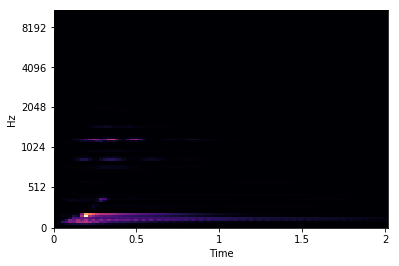

In [11]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [12]:
# Example of a Siren spectrogram
y, sr = librosa.load('datasets/dataset/audio/Guitar_Only/dm/dm100.wav',duration=2)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape


(128, 79)

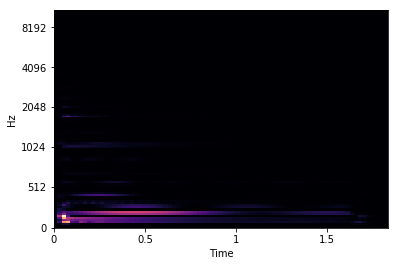

In [13]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [19]:
valid_data['path'] =  valid_data['classname'].astype('str') + '/' + valid_data['file_name'].astype('str')

In [23]:
D = [] # Dataset

for row in valid_data.itertuples():
    y, sr = librosa.load('datasets/dataset/audio/Guitar_Only/' + row.path,duration=2)  
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    if ps.shape != (128, 87): continue
    D.append( (ps, row.classID) )

In [24]:
print("Number of samples: ", len(D))

Number of samples:  633


In [25]:
dataset = D
random.shuffle(dataset)

train = dataset[:500]
test = dataset[500:]




In [11]:
print(train[0])
print(train[0][0].shape)   #shape of input image
print(train[0][0][0][1])
print(train[0][1])    #output class id

(array([[9.52675048e-05, 2.00366080e-04, 2.38692748e-04, ...,
        7.74645795e-04, 5.43920257e-04, 2.63539335e-04],
       [1.42070538e-05, 1.14087996e-04, 2.76787563e-04, ...,
        7.13397699e-06, 4.53298258e-06, 5.44526140e-06],
       [5.93618105e-05, 9.04152098e-04, 1.83172125e-02, ...,
        1.00968256e-04, 6.88441465e-05, 8.31746349e-05],
       ...,
       [1.62716236e-08, 9.55521321e-08, 3.46890219e-07, ...,
        4.06550707e-08, 1.33339888e-08, 1.06234284e-08],
       [8.39884594e-09, 1.06265874e-07, 4.94977719e-07, ...,
        9.12681540e-09, 5.27039859e-09, 4.08229752e-09],
       [4.69355714e-09, 3.43316895e-09, 7.49775419e-09, ...,
        6.82561625e-10, 6.22172959e-10, 5.83746454e-10]]), 0)
(128, 87)
0.00020036607966662033
0


In [12]:
X_train, y_train = zip(*train)
X_test, y_test = zip(*test)
print(X_train[0].shape)
print(X_train[0])
print(y_train[0])

(128, 87)
[[9.52675048e-05 2.00366080e-04 2.38692748e-04 ... 7.74645795e-04
  5.43920257e-04 2.63539335e-04]
 [1.42070538e-05 1.14087996e-04 2.76787563e-04 ... 7.13397699e-06
  4.53298258e-06 5.44526140e-06]
 [5.93618105e-05 9.04152098e-04 1.83172125e-02 ... 1.00968256e-04
  6.88441465e-05 8.31746349e-05]
 ...
 [1.62716236e-08 9.55521321e-08 3.46890219e-07 ... 4.06550707e-08
  1.33339888e-08 1.06234284e-08]
 [8.39884594e-09 1.06265874e-07 4.94977719e-07 ... 9.12681540e-09
  5.27039859e-09 4.08229752e-09]
 [4.69355714e-09 3.43316895e-09 7.49775419e-09 ... 6.82561625e-10
  6.22172959e-10 5.83746454e-10]]
0


In [13]:

# Reshape for CNN input
X_train = np.array([x.reshape( (128, 87, 1) ) for x in X_train])
X_test = np.array([x.reshape( (128, 87, 1) ) for x in X_test])



In [48]:
print(X_train[0].shape)
print(y_train[0])

(128, 87, 1)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
# One-Hot encoding for classes
y_train = np.array(keras.utils.to_categorical(y_train, 10))
y_test_values=y_test
y_test = np.array(keras.utils.to_categorical(y_test, 10))



In [16]:
print(y_train[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [3]:
model = Sequential()
input_shape=(128, 87, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

In [4]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 83, 24)       624       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 41, 24)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 31, 41, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 37, 48)        28848     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 18, 48)         0         
_________________________________________________________________
activation_2 (Activation)    (None, 6, 18, 48)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 14, 48)         57648     
__________

In [26]:
def precision(y_true, y_pred):
    '''Calculates the precision, a metric for multi-label classification of
    how many selected items are relevant.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    '''Calculates the recall, a metric for multi-label classification of
    how many relevant items are selected.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def fbeta_score(y_true, y_pred, beta=1):
    '''Calculates the F score, the weighted harmonic mean of precision and recall.
    This is useful for multi-label classification, where input samples can be
    classified as sets of labels. By only using accuracy (precision) a model
    would achieve a perfect score by simply assigning every class to every
    input. In order to avoid this, a metric should penalize incorrect class
    assignments as well (recall). The F-beta score (ranged from 0.0 to 1.0)
    computes this, as a weighted mean of the proportion of correct class
    assignments vs. the proportion of incorrect class assignments.
    With beta = 1, this is equivalent to a F-measure. With beta < 1, assigning
    correct classes becomes more important, and with beta > 1 the metric is
    instead weighted towards penalizing incorrect class assignments.
    '''
    if beta < 0:
        raise ValueError('The lowest choosable beta is zero (only precision).')
        
    # If there are no true positives, fix the F score at 0 like sklearn.
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    bb = beta ** 2
    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
    return fbeta_score


def fmeasure(y_true, y_pred):
    '''Calculates the f-measure, the harmonic mean of precision and recall.
    '''
    return fbeta_score(y_true, y_pred, beta=1)

In [32]:
model.compile(
	optimizer="Adam",
	loss="categorical_crossentropy",
	metrics=['accuracy', precision, recall,fmeasure])

model.fit(
	x=X_train, 
	y=y_train,
    epochs=70,
    batch_size=20,
    validation_data= (X_test, y_test))

score = model.evaluate(
	x=X_test,
	y=y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test precision:', score[2])
print('Test recall:', score[3])
print('Test f1-score:', score[4])


Train on 500 samples, validate on 133 samples
Epoch 1/70
500/500 [==============================] - 1s 1ms/step - loss: 0.3348 - acc: 0.8620 - precision: 0.8926 - recall: 0.8120 - fmeasure: 0.8490 - val_loss: 0.5977 - val_acc: 0.8271 - val_precision: 0.8540 - val_recall: 0.8045 - val_fmeasure: 0.8281
Epoch 2/70
500/500 [==============================] - 0s 453us/step - loss: 0.3402 - acc: 0.8500 - precision: 0.8832 - recall: 0.8140 - fmeasure: 0.8462 - val_loss: 0.5331 - val_acc: 0.8421 - val_precision: 0.8527 - val_recall: 0.8271 - val_fmeasure: 0.8395
Epoch 3/70
500/500 [==============================] - 0s 438us/step - loss: 0.2886 - acc: 0.8840 - precision: 0.9106 - recall: 0.8580 - fmeasure: 0.8828 - val_loss: 0.4345 - val_acc: 0.8346 - val_precision: 0.8600 - val_recall: 0.8195 - val_fmeasure: 0.8382
Epoch 4/70
500/500 [==============================] - 0s 435us/step - loss: 0.5222 - acc: 0.8580 - precision: 0.8818 - recall: 0.8280 - fmeasure: 0.8530 - val_loss: 1.0509 - val_acc:

Epoch 64/70
500/500 [==============================] - 0s 442us/step - loss: 0.1959 - acc: 0.9460 - precision: 0.9514 - recall: 0.9460 - fmeasure: 0.9486 - val_loss: 0.4190 - val_acc: 0.8797 - val_precision: 0.8797 - val_recall: 0.8797 - val_fmeasure: 0.8797
Epoch 65/70
500/500 [==============================] - 0s 460us/step - loss: 0.1769 - acc: 0.9500 - precision: 0.9513 - recall: 0.9420 - fmeasure: 0.9465 - val_loss: 0.3769 - val_acc: 0.8872 - val_precision: 0.8872 - val_recall: 0.8872 - val_fmeasure: 0.8872
Epoch 66/70
500/500 [==============================] - 0s 444us/step - loss: 0.1607 - acc: 0.9540 - precision: 0.9577 - recall: 0.9480 - fmeasure: 0.9527 - val_loss: 0.3682 - val_acc: 0.8947 - val_precision: 0.8947 - val_recall: 0.8872 - val_fmeasure: 0.8909
Epoch 67/70
500/500 [==============================] - 0s 463us/step - loss: 0.1570 - acc: 0.9540 - precision: 0.9614 - recall: 0.9480 - fmeasure: 0.9545 - val_loss: 1.8865 - val_acc: 0.7444 - val_precision: 0.7479 - val_re

In [33]:
predictions = model.predict_classes(X_test)
predictions


array([9, 1, 4, 1, 9, 6, 5, 4, 3, 4, 8, 3, 4, 9, 4, 4, 7, 9, 9, 1, 5, 0,
       4, 9, 5, 1, 1, 5, 5, 3, 4, 8, 3, 4, 1, 7, 6, 9, 6, 7, 6, 3, 9, 3,
       8, 7, 4, 9, 6, 8, 8, 9, 6, 1, 9, 3, 1, 3, 6, 3, 1, 3, 9, 8, 3, 7,
       1, 6, 4, 1, 3, 3, 3, 3, 6, 4, 9, 4, 4, 7, 8, 3, 3, 4, 4, 1, 4, 7,
       1, 4, 4, 9, 5, 1, 7, 4, 8, 8, 4, 1, 6, 9, 3, 6, 1, 1, 5, 0, 6, 3,
       3, 9, 4, 9, 6, 3, 5, 9, 3, 1, 0, 7, 9, 6, 0, 7, 9, 4, 1, 1, 8, 5,
       6])

In [34]:
y_test_values=np.array(y_test_values)
y_test_values


array([9, 1, 4, 1, 9, 6, 4, 5, 3, 4, 8, 3, 5, 9, 4, 5, 7, 9, 9, 9, 7, 0,
       4, 9, 4, 1, 1, 5, 5, 3, 0, 8, 3, 5, 0, 7, 6, 9, 6, 6, 6, 3, 9, 3,
       3, 7, 4, 9, 6, 8, 8, 7, 6, 1, 9, 3, 1, 3, 6, 3, 1, 3, 9, 6, 3, 7,
       1, 6, 4, 1, 3, 1, 3, 3, 6, 5, 9, 4, 4, 7, 6, 3, 3, 4, 4, 1, 4, 7,
       0, 4, 4, 9, 4, 7, 7, 4, 8, 8, 4, 1, 6, 9, 3, 6, 1, 1, 5, 0, 6, 3,
       3, 9, 4, 3, 6, 6, 5, 9, 3, 1, 6, 7, 9, 6, 0, 6, 9, 4, 1, 0, 8, 4,
       6])

In [35]:
 from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test_values, predictions, labels=[0,1,2,3,4,5,6,7,8,9])
conf_mat

array([[ 3,  3,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 15,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 20,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 17,  4,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  5,  4,  0,  0,  0,  0],
       [ 1,  0,  0,  1,  0,  0, 15,  2,  2,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  8,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  7,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0, 18]])

## Data Augmentation

### 1. Vary Time

In [60]:
rate = 1.07 # replace with 0.81 and execute again

for row in valid_data.itertuples():
    y, sr = librosa.load('datasets/dataset/audio/Guitar_Only/' + row.path)  
    y_changed = librosa.effects.time_stretch(y, rate=rate)
    librosa.output.write_wav('datasets/dataset/augmented/' + str(row.classname) + '/speed_' + str(int(rate*100)) + '/' + row.file_name,y_changed, sr)

In [61]:
rate = 0.81

for row in valid_data.itertuples():
    y, sr = librosa.load('datasets/dataset/audio/Guitar_Only/' + row.path)  
    y_changed = librosa.effects.time_stretch(y, rate=rate)
    librosa.output.write_wav('datasets/dataset/augmented/' + str(row.classname) + '/speed_' + str(int(rate*100)) + '/' + row.file_name ,y_changed, sr)

### 2. Vary pitch

In [62]:
n_steps = 2 #-1, -2, 2, 1

for row in valid_data.itertuples():
    y, sr = librosa.load('datasets/dataset/audio/Guitar_Only/' + row.path)  
    y_changed = librosa.effects.pitch_shift(y, sr, n_steps=n_steps)
    librosa.output.write_wav('datasets/dataset/augmented/' + str(row.classname) + '/ps1_' + str(int(n_steps)) + '/' + row.file_name ,y_changed, sr)

### 3. Change Pitch (PS2)

In [63]:
n_steps = 2.5 #-2.5, -3.5, 2.5, 3.5

for row in valid_data.itertuples():
    y, sr = librosa.load('datasets/dataset/audio/Guitar_Only/' + row.path)   
    y_changed = librosa.effects.pitch_shift(y, sr, n_steps=n_steps)
    librosa.output.write_wav('datasets/dataset/augmented/' + str(row.classname) + '/ps2_m' + str(int(n_steps*10)) + '/' + row.file_name ,y_changed, sr)

In [64]:
# Example of a Siren spectrogram
y, sr = librosa.load('datasets/dataset/augmented/am/ps2_m25/am25.wav',duration=2)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape


(128, 87)

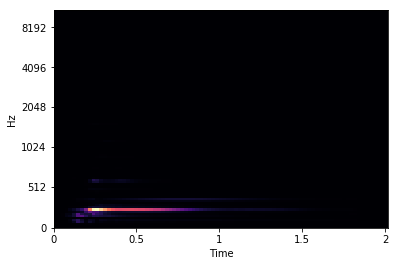

In [65]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [76]:
# Example of a Siren spectrogram
y, sr = librosa.load('datasets/dataset/augmented/em/ps1_2/em50.wav',duration=2)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape


(128, 87)

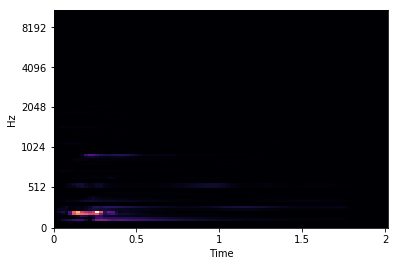

In [77]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [78]:
# Example of a Siren spectrogram
y, sr = librosa.load('datasets/dataset/augmented/d/speed_81/d200.wav',duration=2)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape


(128, 76)

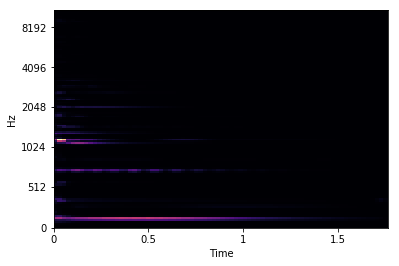

In [79]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [80]:
# Example of a Siren spectrogram
y, sr = librosa.load('datasets/dataset/augmented/g/speed_107/g75.wav',duration=2)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape


(128, 72)

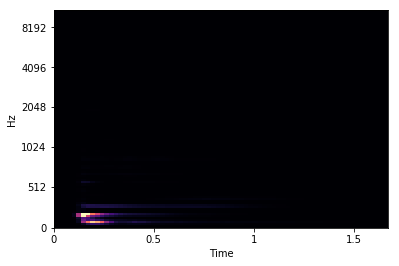

In [81]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [27]:
len(D)

633

In [28]:
rate = 1.07 # replace with 0.81 and execute again

for row in valid_data.itertuples():
    y, sr = librosa.load('datasets/dataset/augmented/' + str(row.classname) + '/speed_' + str(int(rate*100)) + '/' + row.file_name,duration=2)  
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    if ps.shape != (128, 87): continue
    D.append( (ps, row.classID) )
 

In [29]:
len(D)

981

In [30]:
rate = 0.81 # replace with 0.81 and execute again

for row in valid_data.itertuples():
    y, sr = librosa.load('datasets/dataset/augmented/' + str(row.classname) + '/speed_' + str(int(rate*100)) + '/' + row.file_name,duration=2)  
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    if ps.shape != (128, 87): continue
    D.append( (ps, row.classID) )
 

In [31]:
len(D)

2594

In [32]:
n_steps = 2 #-1, -2, 2, 1

for row in valid_data.itertuples():
    y, sr = librosa.load('datasets/dataset/augmented/' + str(row.classname) + '/ps1_' + str(int(n_steps)) + '/' + row.file_name,duration=2)
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    if ps.shape != (128, 87): continue
    D.append( (ps, row.classID) )

In [33]:
len(D)

3227

In [34]:
n_steps = 2.5 #-1, -2, 2, 1

for row in valid_data.itertuples():
    y, sr = librosa.load('datasets/dataset/augmented/' + str(row.classname) + '/ps2_m' + str(int(n_steps*10)) + '/' + row.file_name,duration=2)
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    if ps.shape != (128, 87): continue
    D.append( (ps, row.classID) )


In [35]:
len(D)

3860

The dataset consists of:
- 1-633 normal samples.
- 634-981 samples speed up by 1.07.
- 982-2594 samples Slowed down to 0.81.
- 2595-3227 samples Pitch modulated 2 semitones higher.
- 3228-3860 samples Pitch modulated 2.5 semitones higher.





In [36]:
dataset = D
random.shuffle(dataset)

train = dataset[:3000]
test = dataset[3000:]

X_train, y_train = zip(*train)
X_test, y_test = zip(*test)

X_train = np.array([x.reshape( (128, 87, 1) ) for x in X_train])
X_test = np.array([x.reshape( (128, 87, 1) ) for x in X_test])

y_train = np.array(keras.utils.to_categorical(y_train, 10))
y_test_values=y_test
y_test = np.array(keras.utils.to_categorical(y_test, 10))

In [37]:
model = Sequential()
input_shape=(128, 87, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

In [38]:
model.compile(
	optimizer="Adam",
	loss="categorical_crossentropy",
	metrics=['accuracy', precision, recall,fmeasure])

model.fit(
	x=X_train, 
	y=y_train,
    epochs=70,
    batch_size=20,
    validation_data= (X_test, y_test))

score = model.evaluate(
	x=X_test,
	y=y_test)

print('\nTest loss:', score[0])
print('Test accuracy:', score[1])
print('Test precision:', score[2])
print('Test recall:', score[3])
print('Test f1-score:', score[4])


Train on 3000 samples, validate on 860 samples
Epoch 1/70
3000/3000 [==============================] - 3s 1ms/step - loss: 2.2070 - acc: 0.1570 - precision: 0.2436 - recall: 0.0213 - fmeasure: 0.0385 - val_loss: 2.0793 - val_acc: 0.2058 - val_precision: 0.3023 - val_recall: 0.0186 - val_fmeasure: 0.0348
Epoch 2/70
3000/3000 [==============================] - 1s 430us/step - loss: 2.0558 - acc: 0.2223 - precision: 0.4404 - recall: 0.0497 - fmeasure: 0.0869 - val_loss: 1.9650 - val_acc: 0.2674 - val_precision: 0.5961 - val_recall: 0.0791 - val_fmeasure: 0.1357
Epoch 3/70
3000/3000 [==============================] - 1s 432us/step - loss: 1.9502 - acc: 0.2777 - precision: 0.6695 - recall: 0.1057 - fmeasure: 0.1783 - val_loss: 1.8556 - val_acc: 0.3267 - val_precision: 0.8244 - val_recall: 0.1279 - val_fmeasure: 0.2158
Epoch 4/70
3000/3000 [==============================] - 1s 433us/step - loss: 1.8717 - acc: 0.3047 - precision: 0.7493 - recall: 0.1490 - fmeasure: 0.2428 - val_loss: 1.8287 -

3000/3000 [==============================] - 1s 440us/step - loss: 0.3730 - acc: 0.8817 - precision: 0.9119 - recall: 0.8577 - fmeasure: 0.8831 - val_loss: 0.6124 - val_acc: 0.8651 - val_precision: 0.8731 - val_recall: 0.8558 - val_fmeasure: 0.8642
Epoch 64/70
3000/3000 [==============================] - 1s 461us/step - loss: 0.2765 - acc: 0.9097 - precision: 0.9257 - recall: 0.8937 - fmeasure: 0.9089 - val_loss: 0.4412 - val_acc: 0.8942 - val_precision: 0.9053 - val_recall: 0.8849 - val_fmeasure: 0.8946
Epoch 65/70
3000/3000 [==============================] - 1s 454us/step - loss: 0.4938 - acc: 0.8803 - precision: 0.9029 - recall: 0.8587 - fmeasure: 0.8796 - val_loss: 0.6605 - val_acc: 0.8558 - val_precision: 0.8780 - val_recall: 0.8337 - val_fmeasure: 0.8547
Epoch 66/70
3000/3000 [==============================] - 1s 452us/step - loss: 0.3493 - acc: 0.8997 - precision: 0.9264 - recall: 0.8703 - fmeasure: 0.8965 - val_loss: 0.5289 - val_acc: 0.8953 - val_precision: 0.9066 - val_recall

In [51]:
X_test.shape

(860, 128, 87, 1)

In [39]:
predictions = model.predict_classes(X_test)
predictions


array([7, 3, 4, 9, 9, 4, 7, 4, 5, 6, 8, 5, 4, 3, 1, 1, 7, 0, 9, 9, 2, 3,
       3, 4, 1, 4, 9, 6, 6, 2, 1, 8, 9, 5, 3, 1, 5, 6, 2, 7, 9, 8, 3, 9,
       9, 6, 4, 9, 6, 6, 4, 7, 2, 1, 4, 6, 3, 9, 3, 5, 1, 1, 4, 0, 3, 5,
       3, 6, 4, 6, 9, 1, 3, 5, 6, 7, 6, 6, 6, 0, 9, 3, 6, 9, 1, 9, 7, 3,
       7, 9, 1, 4, 0, 9, 9, 3, 4, 1, 7, 6, 4, 6, 7, 3, 6, 5, 6, 6, 1, 5,
       6, 0, 1, 5, 7, 7, 3, 2, 1, 4, 6, 1, 8, 0, 1, 4, 4, 6, 4, 1, 9, 1,
       1, 1, 4, 0, 2, 4, 4, 5, 1, 4, 3, 2, 6, 0, 4, 1, 4, 1, 5, 3, 8, 1,
       3, 1, 6, 0, 1, 9, 7, 1, 9, 2, 1, 9, 6, 2, 4, 8, 4, 6, 4, 1, 1, 9,
       4, 5, 0, 6, 1, 7, 5, 6, 3, 6, 9, 1, 8, 9, 3, 7, 4, 0, 1, 4, 1, 2,
       9, 5, 4, 3, 1, 8, 0, 7, 9, 8, 8, 1, 6, 4, 8, 3, 1, 1, 1, 1, 6, 6,
       4, 8, 1, 9, 6, 2, 1, 8, 9, 8, 4, 3, 5, 5, 7, 5, 4, 5, 4, 1, 9, 4,
       7, 5, 8, 9, 6, 1, 0, 9, 0, 6, 7, 5, 3, 6, 6, 0, 9, 7, 0, 0, 1, 6,
       9, 4, 7, 5, 6, 3, 7, 6, 8, 1, 9, 8, 4, 4, 4, 8, 3, 3, 9, 9, 3, 6,
       6, 7, 8, 8, 1, 1, 6, 9, 7, 6, 5, 5, 3, 6, 3,

In [40]:
y_test_values=np.array(y_test_values)
y_test_values


array([7, 3, 4, 9, 9, 4, 7, 4, 5, 6, 1, 5, 4, 3, 1, 1, 7, 0, 9, 8, 2, 3,
       3, 4, 1, 4, 9, 6, 6, 2, 1, 8, 9, 4, 3, 1, 4, 6, 1, 7, 9, 8, 3, 9,
       9, 6, 4, 9, 6, 6, 4, 7, 1, 1, 4, 6, 3, 9, 3, 4, 1, 1, 4, 2, 3, 5,
       3, 6, 4, 6, 9, 1, 3, 5, 6, 7, 6, 6, 6, 0, 9, 3, 6, 9, 1, 8, 7, 3,
       7, 9, 1, 4, 1, 9, 9, 3, 4, 1, 7, 6, 4, 6, 7, 3, 7, 5, 6, 7, 1, 4,
       7, 0, 1, 4, 4, 7, 3, 1, 1, 4, 6, 1, 5, 0, 1, 5, 4, 6, 4, 1, 9, 1,
       1, 1, 3, 0, 2, 5, 4, 5, 1, 4, 3, 2, 6, 0, 4, 1, 4, 1, 5, 3, 8, 1,
       3, 1, 6, 0, 1, 9, 7, 1, 9, 2, 1, 9, 6, 2, 4, 8, 4, 6, 4, 1, 1, 1,
       4, 5, 0, 8, 1, 7, 5, 6, 3, 6, 8, 0, 8, 9, 3, 7, 4, 0, 1, 4, 1, 2,
       9, 5, 4, 3, 1, 8, 0, 5, 9, 8, 8, 1, 6, 4, 9, 3, 1, 1, 1, 5, 6, 6,
       4, 8, 1, 9, 6, 2, 1, 8, 9, 8, 4, 3, 5, 5, 7, 5, 4, 5, 4, 1, 9, 4,
       8, 5, 8, 9, 6, 1, 0, 9, 0, 6, 9, 5, 3, 6, 6, 0, 0, 7, 0, 0, 1, 6,
       9, 4, 7, 5, 6, 3, 7, 6, 8, 1, 9, 8, 4, 4, 4, 8, 3, 3, 9, 9, 3, 6,
       4, 7, 8, 8, 1, 1, 6, 9, 7, 6, 5, 5, 3, 6, 3,

In [41]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test_values, predictions, labels=[0,1,2,3,4,5,6,7,8,9])
conf_mat

array([[ 42,   3,   2,   0,   1,   0,   0,   0,   0,   1],
       [  2, 104,   5,   0,   0,   0,   0,   0,   2,   1],
       [  1,   1,  22,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0, 122,   3,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0,  97,  12,   1,   1,   0,   2],
       [  0,   1,   1,   1,  10,  51,   2,   1,   1,   0],
       [  0,   0,   1,   0,   1,   0, 110,   1,   0,   0],
       [  0,   0,   0,   0,   1,   0,   8,  65,   0,   0],
       [  0,   0,   0,   0,   0,   0,   4,   1,  49,   8],
       [  3,   2,   1,   0,   0,   0,   0,   1,   1, 108]])

In [42]:
from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 

Saved model to disk
